<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeAutomatizado/blob/master/notebooks/1a_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal con mínimos cuadrados


En este ejemplo aprenderemos a realizar un modelo de regresión lineal usando mínimos cuadrados.

Primero importarmos las bibliotecas necesarias:

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Posteriormente cargamos los datos de GPAs de alumnos de licenciatura (fuente: http://onlinestatbook.com/2/case_studies/sat.html)

Campo | Descripción
--|--
high_GPA | High school grade point average
math_SAT | Math SAT score
verb_SAT | Verbal SAT score
comp_GPA | Computer science grade point average
univ_GPA | Overall university grade point average


In [2]:
!wget -N http://onlinestatbook.com/2/case_studies/data/sat.txt

--2020-02-26 18:07:18--  http://onlinestatbook.com/2/case_studies/data/sat.txt
Resolving onlinestatbook.com (onlinestatbook.com)... 208.113.186.203
Connecting to onlinestatbook.com (onlinestatbook.com)|208.113.186.203|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘sat.txt’ not modified on server. Omitting download.



Lo cargamos como un `DataFrame` usando Pandas y examinamos los primeros ejemplos

In [3]:
sat = pd.read_csv('sat.txt', sep=' ')
sat.head(5)

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47


Visualizamos las relaciones de cada par de variables usando Seaborn `pairplot`

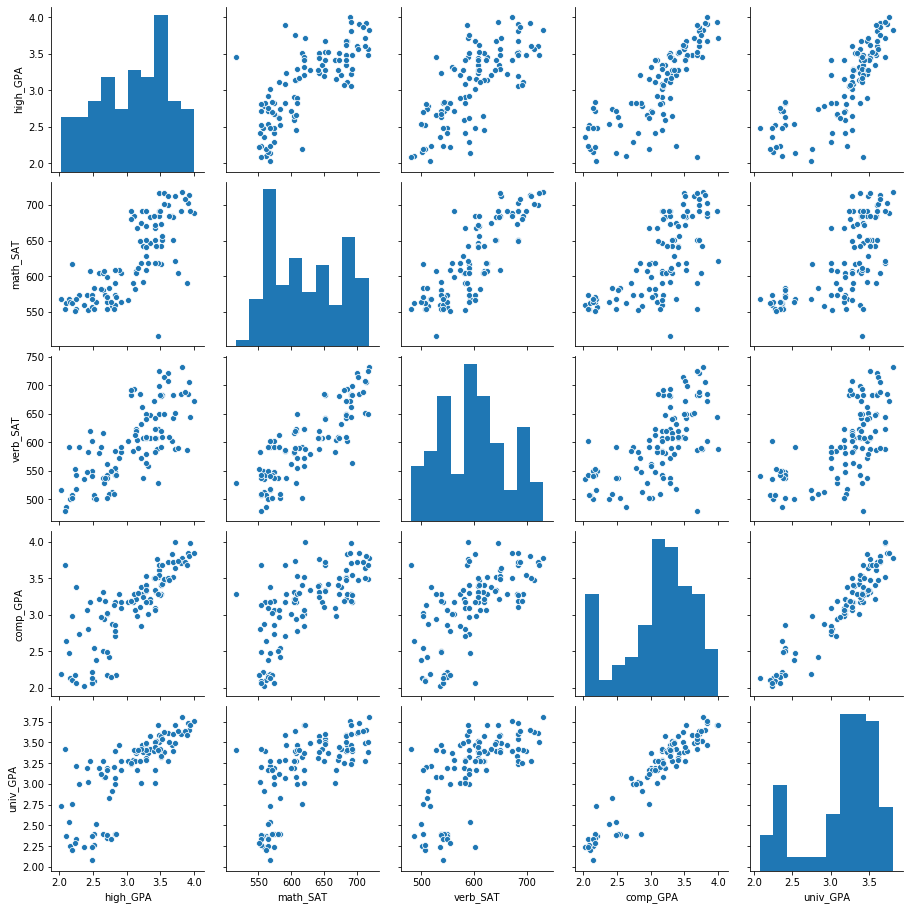

In [4]:
sns.pairplot(sat)
plt.show()

Visualizamos la matriz de correlaciones

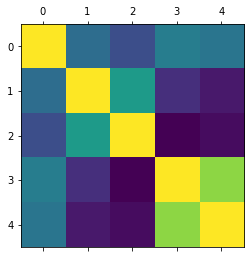

In [5]:
plt.matshow(sat.corr())
plt.show()

Dividimos  aleatoriamente el conjunto de datos en 80% para entrenamiento y 20% para validación


In [0]:
n_ejemplos = sat.shape[0]
permutacion = np.random.permutation(n_ejemplos)

conj_ent = permutacion[:int(n_ejemplos * 0.8)]
conj_valid = permutacion[int(n_ejemplos * 0.8):]

n_ent = conj_ent.shape[0]
n_valid = conj_valid.shape[0]

Usa sólo el atributo Computer Science GPA (columna `comp_GPA`) como regresor para el University GPA (columna `univ_GPA`)


In [0]:
X_ent = sat.comp_GPA[conj_ent]
y_ent = sat.univ_GPA[conj_ent, np.newaxis]

X_valid = sat.comp_GPA[conj_valid]
y_valid = sat.univ_GPA[conj_valid, np.newaxis]

X_rango = np.arange(2.0, 4.0, 0.01) # para graficar modelo

Creamos matriz de diseño, agregando un 1 a cada entrada del conjunto de entrenamiento y validación:

$$
X' = 
\begin{pmatrix}
1 & x_{1} \\
1 & x_{2} \\
\vdots  & \vdots \\
1 & x_{n} 
\end{pmatrix}
$$

In [0]:
ones_ent = np.ones((X_ent.shape[0], 1))
Xp_ent = np.concatenate((ones_ent, X_ent[:,np.newaxis]), axis = 1).T

ones_valid = np.ones((X_valid.shape[0], 1))
Xp_valid = np.concatenate((ones_valid, X_valid[:,np.newaxis]), axis = 1).T

ones_rango = np.ones((X_rango.shape[0], 1))
Xp_rango = np.concatenate((ones_rango, X_rango[:,np.newaxis]), axis = 1).T

Suponemos modelo lineal con un solo atributo, esto es,

$$
f_{\boldsymbol{\theta}}(\mathbf{x}') = \boldsymbol{\theta}^\top \mathbf{x}',
$$

donde $\boldsymbol{\theta}$ y $\mathbf{x}'$ son vectores columna.

In [0]:
f = lambda Xp, theta: theta.T @ Xp

Definimos la función de pérdida o error como la suma de errores cuadráticos

$$
\mathcal{P}_{\theta_0, \theta_1} = \sum_{i=1}^n (y^{(i)} - f_{\theta_0,\theta_1}(x^{(i)}))^2
$$

In [0]:
sse = lambda y, y_hat: np.square(y - y_hat).sum()

Fijamos $\boldsymbol{\theta}$ manualmente a $[1, 4]$ y el ajuste

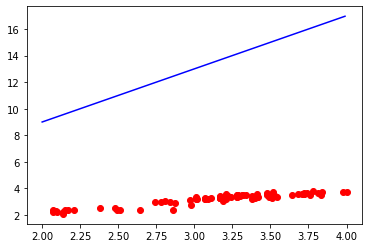

In [11]:
theta = np.array([[1],[4]])

y_ent_hat = f(Xp_ent, theta)[0]
y_valid_hat = f(Xp_valid, theta)[0]

mse_ent = sse(y_ent, y_ent_hat) / n_ent
mse_valid = sse(y_valid, y_valid_hat) / n_valid

y_rango_hat = f(Xp_rango, theta)[0]
plt.plot(X_ent, y_ent, 'ro')
plt.plot(X_rango, y_rango_hat, 'b')
plt.show()

Ahora tntentamos con $\boldsymbol{\theta} = [-2, 2]$

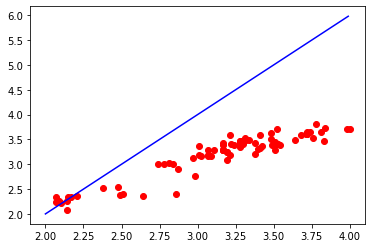

In [12]:
theta = np.array([[-2],[2]])

y_ent_hat = f(Xp_ent, theta)[0]
y_valid_hat = f(Xp_valid, theta)[0]

mse_ent = sse(y_ent, y_ent_hat) / n_ent
mse_valid = sse(y_valid, y_valid_hat) / n_valid

y_rango_hat = f(Xp_rango, theta)[0]
plt.plot(X_ent, y_ent, 'ro')
plt.plot(X_rango, y_rango_hat, 'b')
plt.show()

Estimamos los parámetros por mínimos cuadrados
$$
\boldsymbol{\theta}_{EMV} = (X^\top X)^{-1} X^\top y
$$

In [13]:
def mc(X, y):
  return np.linalg.inv(X.T @ X) @ (X.T @ y)

theta_emv = mc(Xp_ent.T, y_ent)
print('theta_emv = [{0}, {1}]'.format(theta_emv[0,0], theta_emv[1,0]))

theta_emv = [0.5007643184470965, 0.8528531982134666]


Calculamos la suma de errores cuadráticos y el error cuadrático medio para el conjunto de entrenamiento y validación

In [14]:
sse_ent = sse(y_ent, y_ent_hat)
sse_valid = sse(y_valid, y_valid_hat)

mse_ent = sse_ent / n_ent
mse_valid = sse_valid / n_valid

print('SSE(Ent) = {0}, SSE (Valid) = {1}'.format(sse_ent, sse_valid))
print('MSE (Ent) = {0}, MSE (Valid) = {1}'.format(mse_ent, mse_valid))

SSE(Ent) = 16964.211199999998, SSE (Valid) = 1027.6904
MSE (Ent) = 201.95489523809522, MSE (Valid) = 48.93763809523809


Graficamos el modelo a los datos de entrenamiento 
para verificar su ajuste


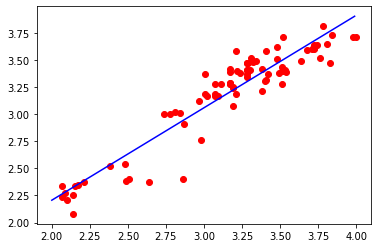

In [15]:
y_rango_hat = f(Xp_rango, theta_emv)[0]
plt.plot(X_ent, y_ent, 'ro')
plt.plot(X_rango, y_rango_hat, 'b')
plt.show()

Calculamos la función de suma de errores cuadráticos para distintos valores de $\theta_0$ y $\theta_1$ y graficamos sus curvas de nivel

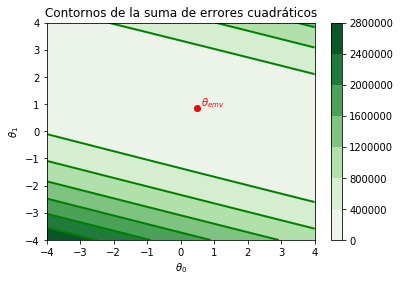

In [16]:
from matplotlib import cm

T0 = np.linspace(-4, 4, num = 400)
T1 = np.linspace(-4, 4, num = 400)
T0, T1 = np.meshgrid(T0, T1)
Z = np.zeros(T0.shape)
for r in range(T0.shape[0]):
  for c in range(T0.shape[1]):
    Z[r,c] = sse(y_ent, f(Xp_ent, np.array([[T0[r,c]], [T1[r,c]]]))[0]) 

norm = cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
cmap = cm.PRGn
fig, ax = plt.subplots()
cs1 = ax.contourf(T0, T1, Z, norm=norm,
                  cmap=cm.get_cmap(cmap))
cs2 = ax.contour(T0, T1, Z, colors='g', linewidths=2)
ax.set_title('Contornos de la suma de errores cuadráticos')
fig.colorbar(cs1, ax=ax)
ax.scatter(np.array([theta_emv[0,0]]), np.array([theta_emv[1,0]]), color='r')
ax.text(theta_emv[0,0] + 0.1, theta_emv[1,0] + 0.1, '$\\theta_{emv}$', color='r')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.show()